In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_excel('Company_x.xlsx')
df.head(10)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,53.0,0,0,1,NaN,NaN,NaN,NaN
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,...,NaN,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,Y,...,NaN,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,...,Cheque,1.0,46.0,2,0,1,NaN,NaN,NaN,NaN
5,932,Creditor 1,13465,1118.74,790.30,790.30,4.22,Other,PASSIVE,Y,...,Cheque,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
6,932,Creditor 1,18664,0.00,71.89,71.89,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,50.0,2,0,1,NaN,NaN,NaN,NaN
7,160,Creditor 2,18816,0.00,11091.35,11091.35,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
8,932,Creditor 1,21091,481.34,404.67,404.67,4.22,Other,CLOSED,Y,...,Cheque,1.0,NaN,1,0,0,NaN,NaN,NaN,NaN
9,932,Creditor 1,24413,0.00,903.76,903.76,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,46.0,1,0,1,NaN,NaN,NaN,NaN


In [3]:
df.shape

(406423, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

In [5]:
df.describe()

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,LastPaymentAmount,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,4.064230e+05,4.064230e+05,406423.000000,406423.000000,406423.000000,403731.000000,103977.000000,406301.000000,376941.000000,406423.000000,406423.000000,406423.000000,0.0,0.0,0.0,1.0
mean,3.970443e+07,3.954380e+08,1301.866266,1539.010928,1600.933847,5.618606,283.896947,1.017145,45.728061,0.435652,0.208113,0.847354,NaN,NaN,NaN,960.0
std,4.698070e+07,4.654769e+08,4030.513710,4416.229311,4531.889319,5.441934,1119.842219,0.132866,12.950395,0.714852,0.434321,0.459690,NaN,NaN,NaN,NaN
min,1.600000e+02,3.677000e+03,-7717.200000,0.000000,0.000000,0.190000,0.010000,1.000000,-41.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,960.0
25%,3.010600e+06,3.023088e+07,85.330000,246.970000,249.875000,3.070000,20.000000,1.000000,36.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
50%,3.010949e+06,3.045075e+07,457.510000,619.000000,630.740000,4.220000,40.000000,1.000000,44.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
75%,9.990131e+07,9.901891e+08,1159.365000,1393.780000,1433.755000,6.590000,142.900000,1.000000,54.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
max,9.990159e+07,9.904958e+08,441681.520000,844343.000000,844343.000000,52.180000,73131.840000,4.000000,133.000000,8.000000,5.000000,7.000000,NaN,NaN,NaN,960.0


In [8]:
df.duplicated().sum()

0

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('*'*15)

EntityID
[     932      160     1504     2796     2691  6005173  2000666  3001032
  3001095  3010718  3001159  3010000  3010719  3010382  3010438  3010479
  3010574  3010575  3010601  3010600  5009101  3010639  3010643  3010645
  3010646  3010647  3010648  3010649  3010650  3010651  3010652  3010653
  3010654  3010657  3010662  3010684  3010686  3010685  3010793  3010831
  3010924  3010885  3010730  3010731  3010893  3011028  3011029  3010949
  3010948  6102901  6102900  3010990  6102960  3011002  3011010  3011020
  6102961  3011023  3011022  3010944  3011032  3011037  3011067  3011065
  3011066  3011068  3010785  3011124  3011125  3011126  3011127  3010703
  5009104  5009112  5009127  5009128  5009129  5009131  5009134  5009135
  5009136  5009138  5009139  5009140  5009145  5009146  5009149  5009151
  5009153  5009155  5009156  5009157  5009158  5009159  5009162  5009163
  5009164  5009167  5009169  5009173  5009174  5009176  5009177  5009178
  5009182  5009184  5009186  5009189  5009

In [12]:
df.isnull().sum()/len(df)*100

EntityID                        0.000000
OriginalCreditor[Redacted]      0.000000
AccountID                       0.000000
CurrentBalance                  0.000000
DebtLoadPrincipal               0.000000
BalanceAtDebtLoad               0.000000
PurchasePrice                   0.662364
ProductOrDebtType               0.000000
CollectionStatus                0.000000
IsStatBarred                    0.000000
ClosureReason                  97.778177
InBankruptcy                    0.000000
AccountInsolvencyType          99.929876
CustomerInsolvencyType         97.900955
IsLegal                         0.000000
LastPaymentAmount              74.416556
LastPaymentMethod              74.416556
NumLiableParties                0.030018
CustomerAge                     7.254019
NumPhones                       0.000000
NumEmails                       0.000000
NumAddresses                    0.000000
Unnamed: 22                   100.000000
Unnamed: 23                   100.000000
Unnamed: 24     

In [13]:
df.value_counts('ClosureReason')

ClosureReason
Insolvent                          5634
Statute Barred                     1777
Other Reason - Please see notes     650
Deceased                            405
Small Balance                       166
Duplicate Debt                      107
Uneconomical to pursue              105
Fraud                                96
Company Struck Off                   37
Client Instructions                  32
Sensitive Issue                      14
Paid                                  4
Incarcerated                          2
Disputes/Legal Case Lost              1
Name: count, dtype: int64

In [15]:
df.shape

(406423, 26)

In [3]:
dx = df.copy()

In [4]:
dx = dx.drop(['AccountInsolvencyType','CustomerInsolvencyType','LastPaymentAmount','LastPaymentMethod','Unnamed: 22','Unnamed: 23'
              ,'Unnamed: 24','Unnamed: 25'],axis=1)

In [30]:
dx.shape

(406423, 18)

In [5]:
for col in dx.columns:
    print(col)
    print(dx[col].unique())
    print('*'*15)

EntityID
[     932      160     1504     2796     2691  6005173  2000666  3001032
  3001095  3010718  3001159  3010000  3010719  3010382  3010438  3010479
  3010574  3010575  3010601  3010600  5009101  3010639  3010643  3010645
  3010646  3010647  3010648  3010649  3010650  3010651  3010652  3010653
  3010654  3010657  3010662  3010684  3010686  3010685  3010793  3010831
  3010924  3010885  3010730  3010731  3010893  3011028  3011029  3010949
  3010948  6102901  6102900  3010990  6102960  3011002  3011010  3011020
  6102961  3011023  3011022  3010944  3011032  3011037  3011067  3011065
  3011066  3011068  3010785  3011124  3011125  3011126  3011127  3010703
  5009104  5009112  5009127  5009128  5009129  5009131  5009134  5009135
  5009136  5009138  5009139  5009140  5009145  5009146  5009149  5009151
  5009153  5009155  5009156  5009157  5009158  5009159  5009162  5009163
  5009164  5009167  5009169  5009173  5009174  5009176  5009177  5009178
  5009182  5009184  5009186  5009189  5009

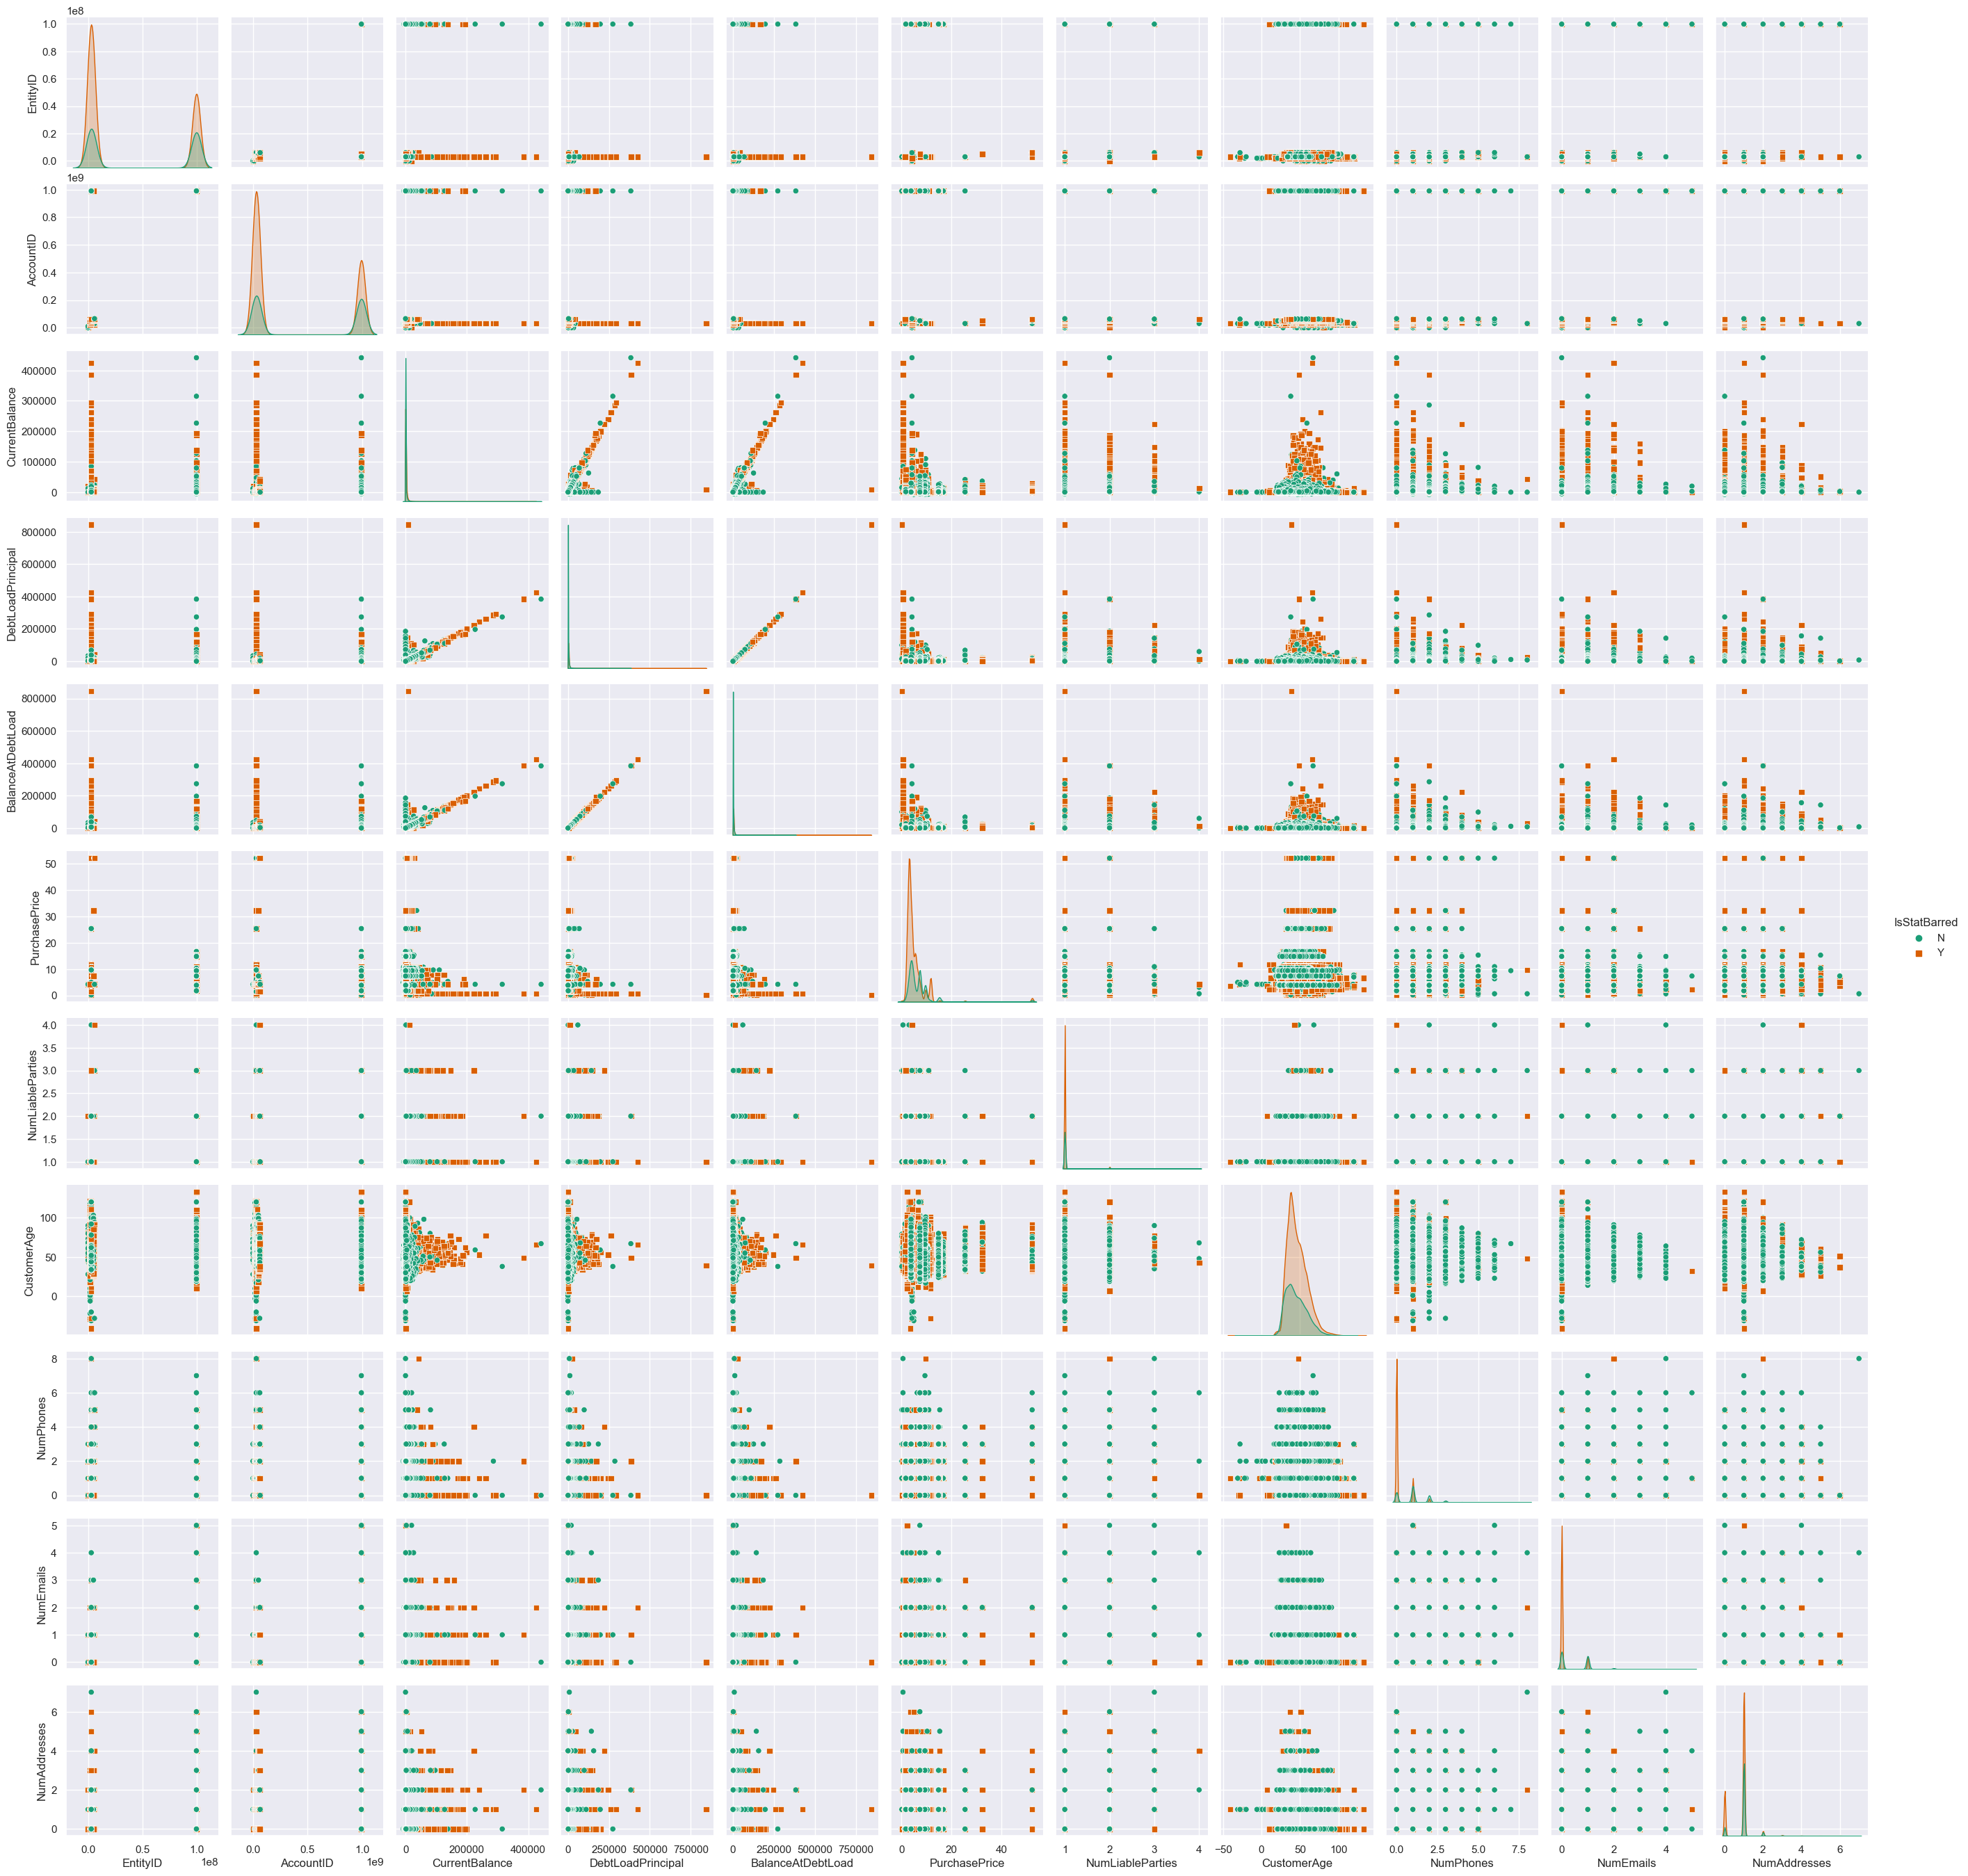

In [33]:
sns.pairplot(dx,hue='IsStatBarred', markers=["o", "s"], palette='Dark2')
plt.show()

In [6]:
unique_counts = dx.nunique()
for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique entries.")

Column 'EntityID' has 229 unique entries.
Column 'OriginalCreditor[Redacted]' has 52 unique entries.
Column 'AccountID' has 406423 unique entries.
Column 'CurrentBalance' has 177653 unique entries.
Column 'DebtLoadPrincipal' has 195921 unique entries.
Column 'BalanceAtDebtLoad' has 198413 unique entries.
Column 'PurchasePrice' has 48 unique entries.
Column 'ProductOrDebtType' has 10 unique entries.
Column 'CollectionStatus' has 12 unique entries.
Column 'IsStatBarred' has 2 unique entries.
Column 'ClosureReason' has 14 unique entries.
Column 'InBankruptcy' has 2 unique entries.
Column 'IsLegal' has 2 unique entries.
Column 'NumLiableParties' has 4 unique entries.
Column 'CustomerAge' has 126 unique entries.
Column 'NumPhones' has 9 unique entries.
Column 'NumEmails' has 6 unique entries.
Column 'NumAddresses' has 8 unique entries.


In [36]:
dx.isnull().sum()/len(dx)*100

EntityID                       0.000000
OriginalCreditor[Redacted]     0.000000
AccountID                      0.000000
CurrentBalance                 0.000000
DebtLoadPrincipal              0.000000
BalanceAtDebtLoad              0.000000
PurchasePrice                  0.662364
ProductOrDebtType              0.000000
CollectionStatus               0.000000
IsStatBarred                   0.000000
ClosureReason                 97.778177
InBankruptcy                   0.000000
IsLegal                        0.000000
NumLiableParties               0.030018
CustomerAge                    7.254019
NumPhones                      0.000000
NumEmails                      0.000000
NumAddresses                   0.000000
dtype: float64

In [5]:
dx = dx.drop(['ClosureReason','NumPhones','NumEmails','NumAddresses'],axis=1)
dx.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.0
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,1.0,NaN
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,N,1.0,NaN
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,1.0,NaN
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.0


In [38]:
dx['PurchasePrice'].value_counts()

PurchasePrice
3.07     84764
2.32     39909
3.60     38075
7.38     34214
4.22     32402
5.72     24862
4.96     18870
6.59     17250
11.70    16655
4.31     16575
9.68     14477
5.34      8523
3.87      8449
9.41      8048
3.96      6536
8.15      4493
52.18     3783
15.31     3521
4.23      3373
1.84      2762
5.11      2281
10.95     1733
14.83     1542
6.31      1449
1.44      1327
25.41     1158
7.74       921
10.30      874
0.19       855
6.93       785
10.75      633
6.08       542
5.00       474
16.70      434
1.77       355
0.65       310
32.27      246
11.07      152
2.35       106
12.00        3
11.67        2
11.71        2
11.73        1
11.10        1
4.00         1
15.00        1
4.97         1
7.00         1
Name: count, dtype: int64

In [6]:
modep = dx['PurchasePrice'].mode()[0]
moden = dx['NumLiableParties'].mode()[0]
dx['PurchasePrice']= dx['PurchasePrice'].fillna(modep)
dx['NumLiableParties']= dx['NumLiableParties'].fillna(moden)
dx['CustomerAge']= dx['CustomerAge'].fillna(dx['CustomerAge'].median())

In [52]:
dx.isnull().sum()

EntityID                      0
OriginalCreditor[Redacted]    0
AccountID                     0
CurrentBalance                0
DebtLoadPrincipal             0
BalanceAtDebtLoad             0
PurchasePrice                 0
ProductOrDebtType             0
CollectionStatus              0
IsStatBarred                  0
InBankruptcy                  0
IsLegal                       0
NumLiableParties              0
CustomerAge                   0
dtype: int64

In [57]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               406423 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  InBankruptcy                406423 non-null  object 
 11  IsLegal                     406423 non-null  object 
 12  NumLiableParties            406423 non-null  float64
 13  CustomerAge   

In [59]:
dx.head(10)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.0
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,1.0,44.0
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,N,1.0,44.0
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,1.0,44.0
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.0
5,932,Creditor 1,13465,1118.74,790.30,790.30,4.22,Other,PASSIVE,Y,N,Y,1.0,44.0
6,932,Creditor 1,18664,0.00,71.89,71.89,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,50.0
7,160,Creditor 2,18816,0.00,11091.35,11091.35,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,44.0
8,932,Creditor 1,21091,481.34,404.67,404.67,4.22,Other,CLOSED,Y,N,N,1.0,44.0
9,932,Creditor 1,24413,0.00,903.76,903.76,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,46.0


In [61]:
col = ['EntityID','AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
        'NumLiableParties', 'CustomerAge']

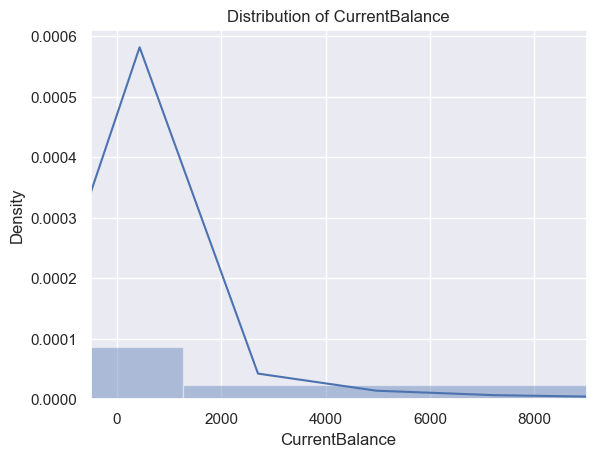

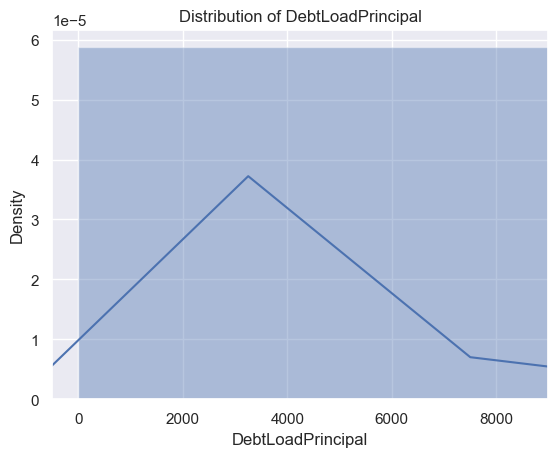

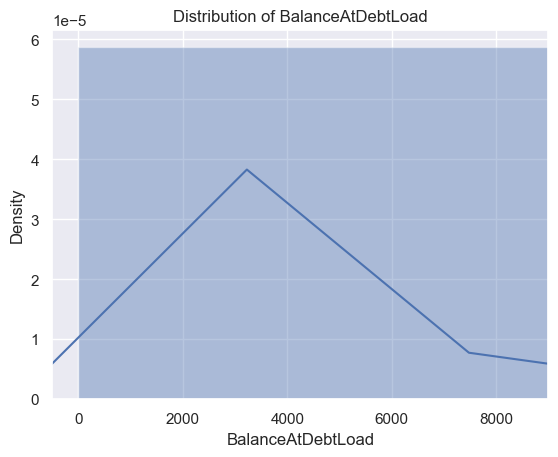

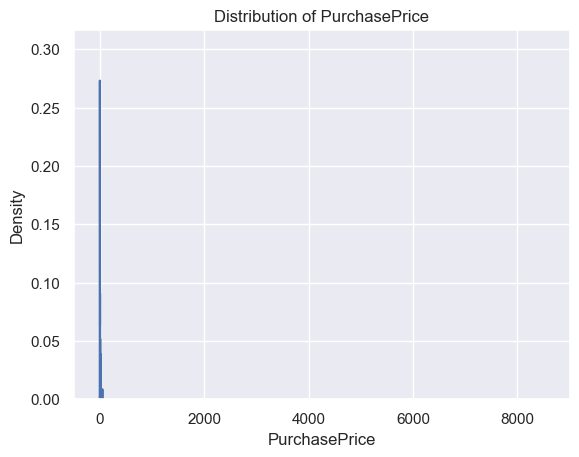

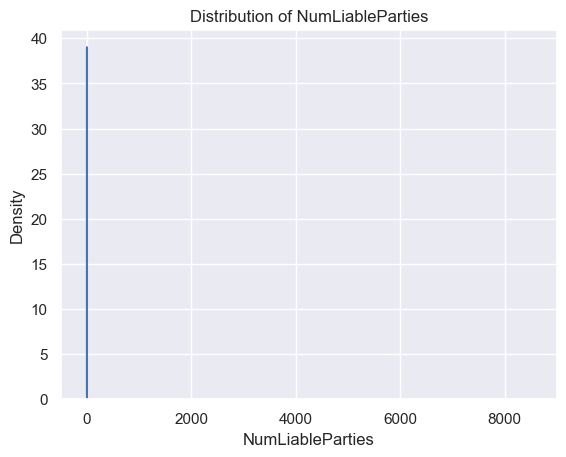

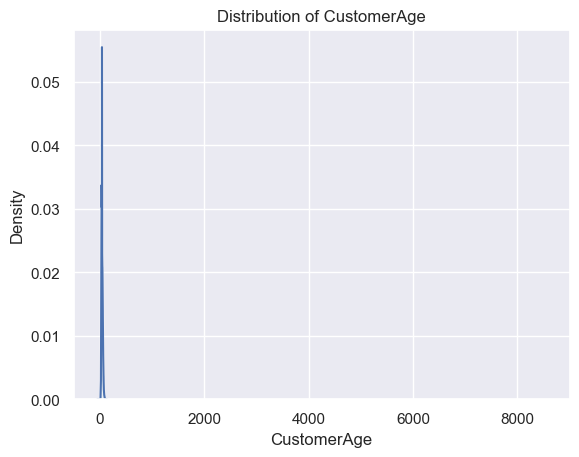

In [65]:
# distribution -
for i in col[2:]:
    sns.distplot(dx[i])
    plt.title(f'Distribution of {i}')
    plt.xlim(-500,9000)
    plt.show()

In [66]:
dx.columns

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'IsStatBarred', 'InBankruptcy',
       'IsLegal', 'NumLiableParties', 'CustomerAge'],
      dtype='object')

(-500.0, 6000.0)

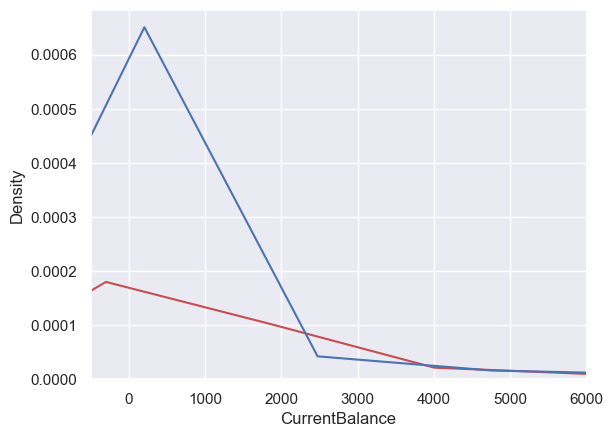

In [73]:
sns.distplot(dx[dx['IsStatBarred']=='Y']['CurrentBalance'],hist=False,color='r')
sns.distplot(dx[dx['IsStatBarred']=='N']['CurrentBalance'],hist=False)
plt.xlim(-500,6000)

Text(0.5, 1.0, 'IsStatBarred vs Bankruptcy')

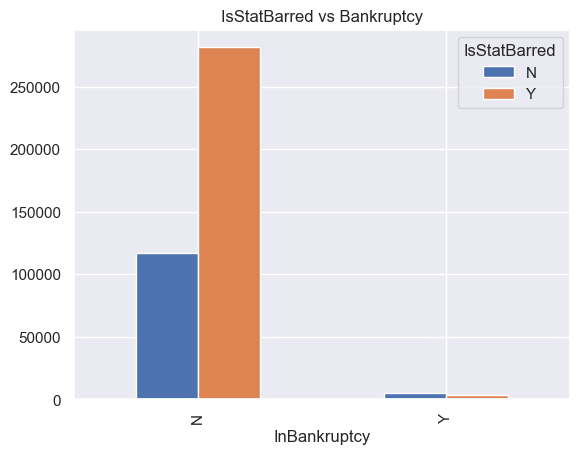

In [76]:
bnk = pd.crosstab(dx['InBankruptcy'], dx['IsStatBarred'])
bnk.plot(kind='bar')
plt.title("IsStatBarred vs Bankruptcy")

In [83]:
bnk0= dx[(dx['InBankruptcy'] == 'N') & (dx['IsStatBarred'] == 'N')]
bnk0.shape

(116702, 14)

In [82]:
bnk1= dx[(dx['InBankruptcy'] == 'Y') & (dx['IsStatBarred'] == 'Y')]
bnk1.shape

(2980, 14)

Text(0.5, 1.0, 'IsStatBarred vs IsLegal')

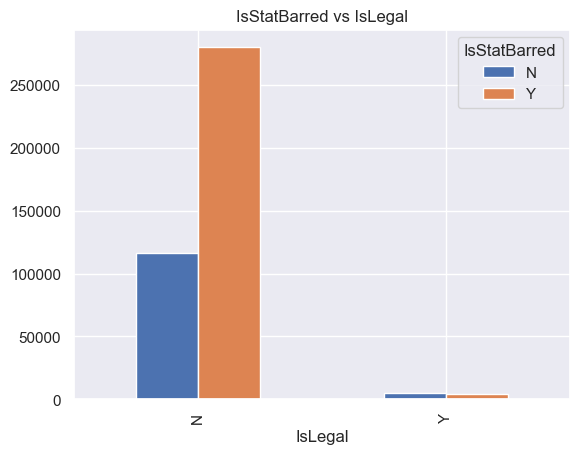

In [77]:
lgl = pd.crosstab(dx['IsLegal'], dx['IsStatBarred'])
lgl.plot(kind='bar')
plt.title("IsStatBarred vs IsLegal")

In [85]:
lg0= dx[(dx['IsLegal'] == 'N') & (dx['IsStatBarred'] == 'Y')]
lg0.shape

(280052, 14)

In [86]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               406423 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  InBankruptcy                406423 non-null  object 
 11  IsLegal                     406423 non-null  object 
 12  NumLiableParties            406423 non-null  float64
 13  CustomerAge   

In [7]:
cols = ['CurrentBalance','DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice', 'CustomerAge']

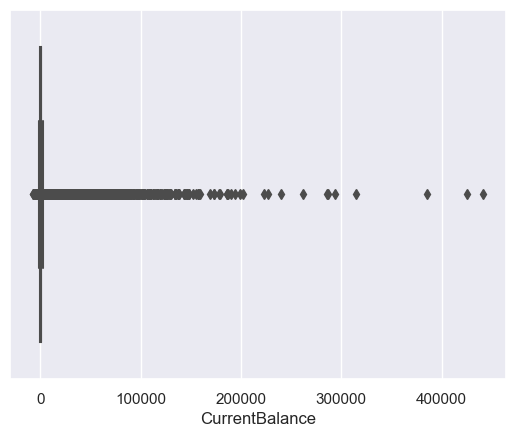

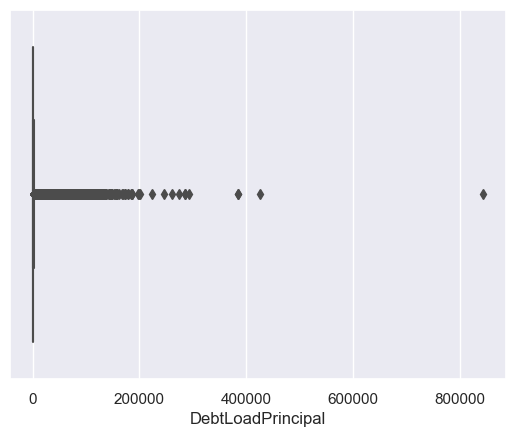

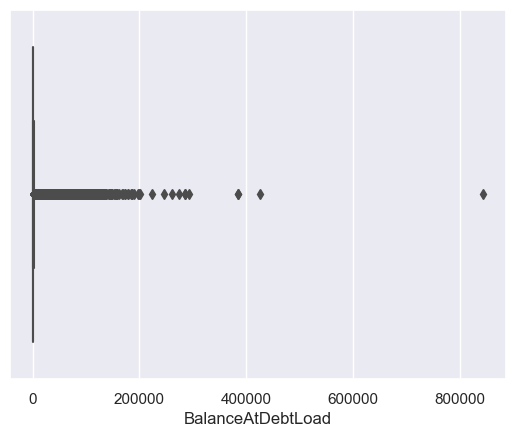

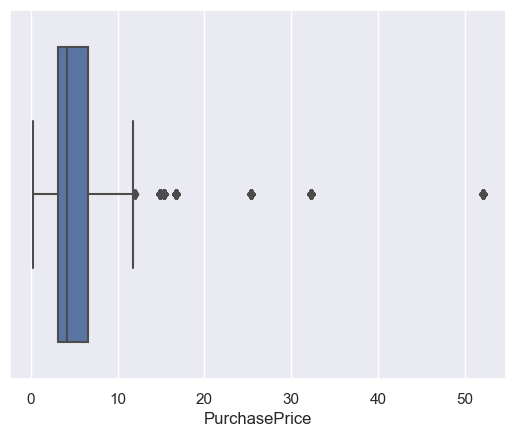

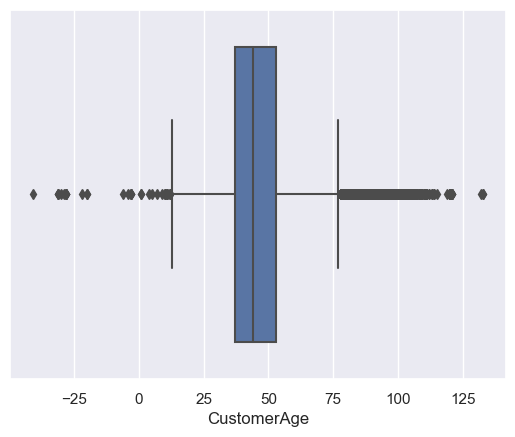

In [8]:
for i in cols:
  sns.boxplot(x = dx[i])
  plt.show()

(0.0, 6000.0)

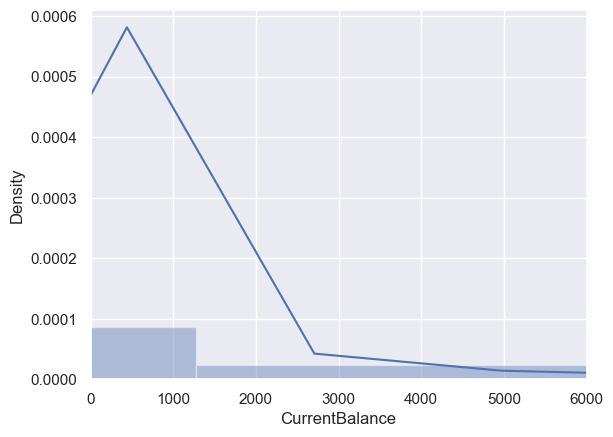

In [97]:
sns.distplot(dx['CurrentBalance'])
plt.xlim(0,6000)

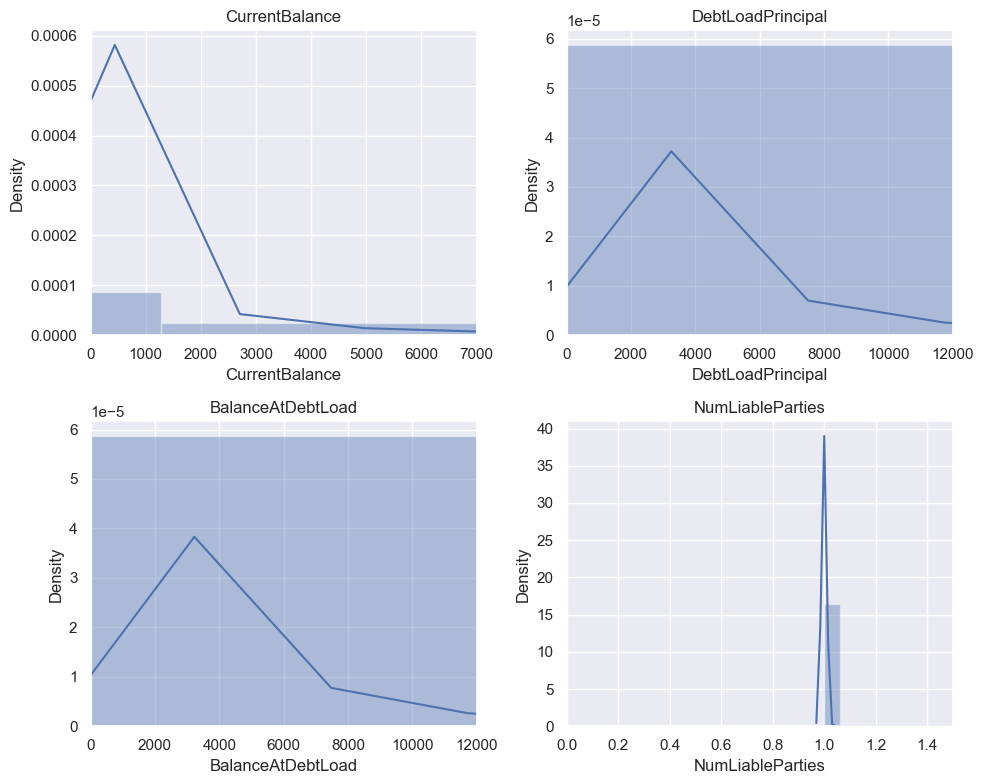

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))


sns.distplot(dx['CurrentBalance'], ax=axes[0, 0])
axes[0, 0].set_xlim(0, 7000)
axes[0, 0].set_title('CurrentBalance')


sns.distplot(dx['DebtLoadPrincipal'], ax=axes[0, 1])
axes[0, 1].set_xlim(0, 12000)
axes[0, 1].set_title('DebtLoadPrincipal')

sns.distplot(dx['BalanceAtDebtLoad'], ax=axes[1, 0])
axes[1, 0].set_xlim(0, 12000)
axes[1, 0].set_title('BalanceAtDebtLoad')

sns.distplot(dx['NumLiableParties'], ax=axes[1, 1])
axes[1, 1].set_xlim(0, 1.5)
axes[1, 1].set_title('NumLiableParties')

plt.tight_layout()
plt.show()

In [11]:
dx['NumLiableParties'].unique()

array([1., 2., 3., 4.])

In [12]:
dx.describe()

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,NumLiableParties,CustomerAge
count,4.064230e+05,4.064230e+05,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000
mean,3.970443e+07,3.954380e+08,1301.866266,1539.010928,1600.933847,5.601724,1.017140,45.602707
std,4.698070e+07,4.654769e+08,4030.513710,4416.229311,4531.889319,5.427819,0.132846,12.479892
min,1.600000e+02,3.677000e+03,-7717.200000,0.000000,0.000000,0.190000,1.000000,-41.000000
25%,3.010600e+06,3.023088e+07,85.330000,246.970000,249.875000,3.070000,1.000000,37.000000
50%,3.010949e+06,3.045075e+07,457.510000,619.000000,630.740000,4.220000,1.000000,44.000000
75%,9.990131e+07,9.901891e+08,1159.365000,1393.780000,1433.755000,6.590000,1.000000,53.000000
max,9.990159e+07,9.904958e+08,441681.520000,844343.000000,844343.000000,52.180000,4.000000,133.000000


In [9]:
for i in cols:
    q1 = dx[i].quantile(0.25)
    q3 = dx[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    dx.loc[(dx[i]>upper),i] = upper
    dx.loc[(dx[i]<lower),i] = lower

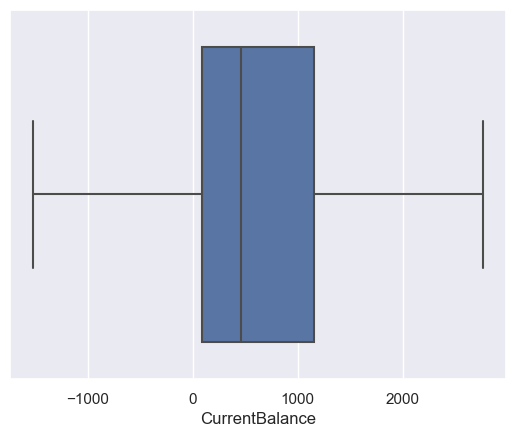

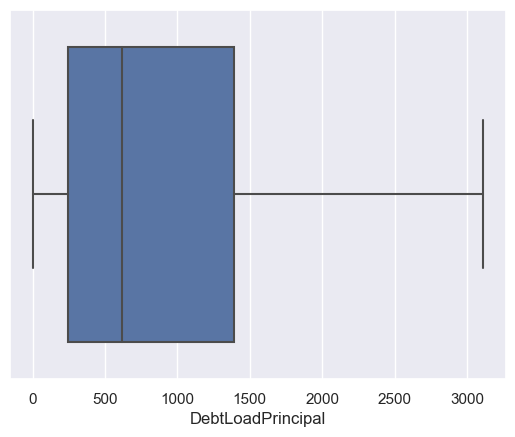

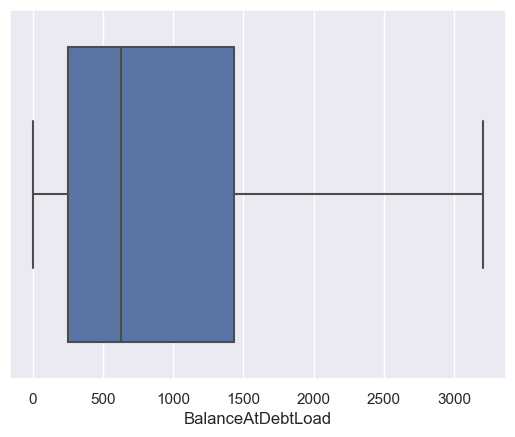

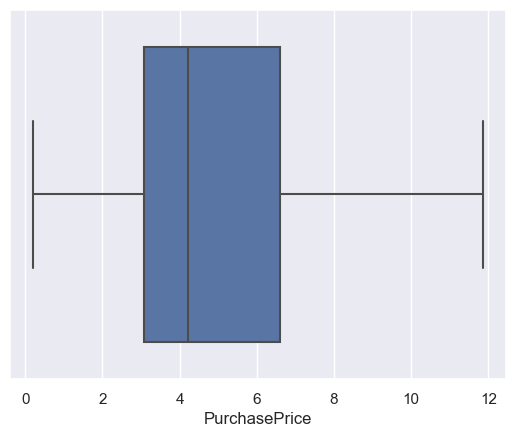

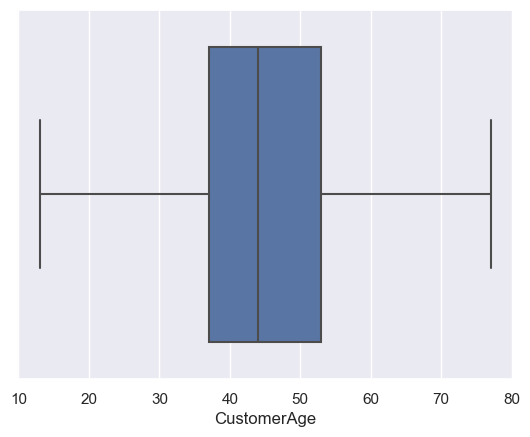

In [10]:
for i in cols:
  sns.boxplot(x = dx[i])
  plt.show()

In [11]:
ds = dx.copy()

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               406423 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  InBankruptcy                406423 non-null  object 
 11  IsLegal                     406423 non-null  object 
 12  NumLiableParties            406423 non-null  float64
 13  CustomerAge   

In [19]:
col = ['ProductOrDebtType', 'CollectionStatus', 'InBankruptcy','IsLegal']

In [24]:
ds['ProductOrDebtType'].value_counts()/len(ds)*100

ProductOrDebtType
Utilities/Telco - Other    52.201278
Other                      20.721760
Finance Company - Other    11.981359
Store Cards                 4.354822
Credit Cards                4.156015
Bank - Other                3.206019
Residential Electricity     1.892855
Personal Loans              1.060225
Loans                       0.310022
Hire Purchase               0.115643
Name: count, dtype: float64

In [44]:
mean_encoding = ds.groupby('ProductOrDebtType')['IsStatBarred'].mean().to_dict()

# Map the mean encoding back to the DataFrame
ds['PDT_Mean_Encoded'] = ds['ProductOrDebtType'].map(mean_encoding)
ds.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded,PDT_Mean_Encoded
0,932,Creditor 1,3677,0.0000,1160.200,1160.200,4.22,Other,PAID_IN_FULL,0,0,1,1.0,40,0.375,0.670545
1,160,Creditor 2,4276,182.9000,182.900,182.900,4.22,Other,CANCELLED_WITHDRAWN,1,0,0,1.0,31,0.500,0.670545
2,932,Creditor 1,8525,0.0000,538.570,538.570,4.22,Other,PAID_IN_FULL,0,0,0,1.0,31,0.375,0.670545
3,160,Creditor 2,9859,2770.4175,3113.995,3209.575,4.22,Other,PASSIVE,1,0,0,1.0,31,0.500,0.670545
4,932,Creditor 1,12807,0.0000,523.000,523.000,4.22,Other,PAID_IN_FULL,1,0,1,1.0,33,0.375,0.670545


In [46]:
ds['PDT_Mean_Encoded'].value_counts()

PDT_Mean_Encoded
0.849296    212158
0.670545     84218
0.244871     48695
0.790836     17699
0.581375     16891
0.722870     13030
0.000130      7693
0.398236      4309
0.551587      1260
0.678723       470
Name: count, dtype: int64

In [27]:
ds['CollectionStatus'].value_counts()

CollectionStatus
ACTIVE                 169489
PASSIVE                138040
PAID_IN_FULL            69172
CLOSED                  13562
CANCELLED_WITHDRAWN      5489
UNDER_ARRANGEMENT        4237
SETTLED FOR LESS         4191
LEGAL                    1559
LEGAL_ARRANGEMENT         361
NON_COLLECTION            237
HOLDING                    59
PENDING                    27
Name: count, dtype: int64

In [45]:
mean_encoding = ds.groupby('CollectionStatus')['IsStatBarred'].mean().to_dict()

# Map the mean encoding back to the DataFrame
ds['CS_Mean_Encoded'] = ds['CollectionStatus'].map(mean_encoding)
ds.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded,PDT_Mean_Encoded,CS_Mean_Encoded
0,932,Creditor 1,3677,0.0000,1160.200,1160.200,4.22,Other,PAID_IN_FULL,0,0,1,1.0,40,0.375,0.670545,0.011681
1,160,Creditor 2,4276,182.9000,182.900,182.900,4.22,Other,CANCELLED_WITHDRAWN,1,0,0,1.0,31,0.500,0.670545,0.016943
2,932,Creditor 1,8525,0.0000,538.570,538.570,4.22,Other,PAID_IN_FULL,0,0,0,1.0,31,0.375,0.670545,0.011681
3,160,Creditor 2,9859,2770.4175,3113.995,3209.575,4.22,Other,PASSIVE,1,0,0,1.0,31,0.500,0.670545,0.993067
4,932,Creditor 1,12807,0.0000,523.000,523.000,4.22,Other,PAID_IN_FULL,1,0,1,1.0,33,0.375,0.670545,0.011681


In [32]:
ds['IsStatBarred'].value_counts()

IsStatBarred
Y    284548
N    121875
Name: count, dtype: int64

In [28]:
ds['OriginalCreditor[Redacted]'].value_counts()

OriginalCreditor[Redacted]
Creditor 17    84768
Creditor 33    55326
Creditor 47    54895
Creditor 48    24862
Creditor 7     22102
Creditor 19    20454
Creditor 10    18937
Creditor 44    17242
Creditor 25    16663
Creditor 42    15934
Creditor 35    14480
Creditor 50    13240
Creditor 43     7441
Creditor 8      6548
Creditor 49     5682
Creditor 36     3787
Creditor 41     2763
Creditor 52     2367
Creditor 40     2281
Creditor 9      2007
Creditor 30     1460
Creditor 6      1333
Creditor 34     1327
Creditor 45     1263
Creditor 31     1169
Creditor 39      927
Creditor 51      874
Creditor 23      863
Creditor 32      860
Creditor 46      785
Creditor 18      770
Creditor 29      662
Creditor 38      633
Creditor 21      483
Creditor 28      273
Creditor 3       173
Creditor 24      159
Creditor 20      156
Creditor 37      106
Creditor 11       83
Creditor 12       82
Creditor 13       78
Creditor 27       59
Creditor 14       30
Creditor 4        13
Creditor 1         8
Credito

In [42]:
mean_encoding = ds.groupby('OriginalCreditor[Redacted]')['IsStatBarred'].mean().to_dict()

# Map the mean encoding back to the DataFrame
ds['Creditor_Mean_Encoded'] = ds['OriginalCreditor[Redacted]'].map(mean_encoding)
ds.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded
0,932,Creditor 1,3677,0.0000,1160.200,1160.200,4.22,Other,PAID_IN_FULL,0,0,1,1.0,40,0.375
1,160,Creditor 2,4276,182.9000,182.900,182.900,4.22,Other,CANCELLED_WITHDRAWN,1,0,0,1.0,31,0.500
2,932,Creditor 1,8525,0.0000,538.570,538.570,4.22,Other,PAID_IN_FULL,0,0,0,1.0,31,0.375
3,160,Creditor 2,9859,2770.4175,3113.995,3209.575,4.22,Other,PASSIVE,1,0,0,1.0,31,0.500
4,932,Creditor 1,12807,0.0000,523.000,523.000,4.22,Other,PAID_IN_FULL,1,0,1,1.0,33,0.375


In [43]:
ds['Creditor_Mean_Encoded'].value_counts()

Creditor_Mean_Encoded
0.853482    84768
0.810505    55326
0.752400    54895
0.872536    24862
0.643516    22102
0.428865    20454
0.483973    18937
0.726946    17242
0.944848    16663
0.622380    15934
0.000000    15610
0.559254    14480
0.716302     7441
0.683109     6548
0.001760     5682
0.653288     3787
0.870069     2763
0.800088     2281
0.501246     2007
0.554110     1460
0.516879     1333
0.568953     1327
0.627870     1263
0.616766     1169
0.580367      927
0.027460      874
0.482039      863
0.734884      860
0.814013      785
0.610390      770
0.780967      662
0.609795      633
0.780538      483
0.560440      273
0.063584      173
0.691824      159
0.493590      156
0.764151      106
0.060241       83
0.646341       82
0.756410       78
0.711864       59
0.266667       30
0.923077       13
0.500000       10
0.375000        8
1.000000        2
Name: count, dtype: int64

In [50]:
ds = ds.drop(['ProductOrDebtType','CollectionStatus','OriginalCreditor[Redacted]'],axis=1)
ds.head()

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded,PDT_Mean_Encoded,CS_Mean_Encoded
0,932,3677,0.0000,1160.200,1160.200,4.22,0,0,1,1.0,40,0.375,0.670545,0.011681
1,160,4276,182.9000,182.900,182.900,4.22,1,0,0,1.0,31,0.500,0.670545,0.016943
2,932,8525,0.0000,538.570,538.570,4.22,0,0,0,1.0,31,0.375,0.670545,0.011681
3,160,9859,2770.4175,3113.995,3209.575,4.22,1,0,0,1.0,31,0.500,0.670545,0.993067
4,932,12807,0.0000,523.000,523.000,4.22,1,0,1,1.0,33,0.375,0.670545,0.011681


In [38]:
x = ['IsStatBarred','InBankruptcy','IsLegal']

In [39]:
from sklearn.preprocessing import LabelEncoder
for i in x:
    le = LabelEncoder()
    ds[i] = le.fit_transform(ds[i])

In [40]:
ds.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded
0,932,Creditor 1,3677,0.0000,1160.200,1160.200,4.22,Other,PAID_IN_FULL,0,0,1,1.0,40,None
1,160,Creditor 2,4276,182.9000,182.900,182.900,4.22,Other,CANCELLED_WITHDRAWN,1,0,0,1.0,31,None
2,932,Creditor 1,8525,0.0000,538.570,538.570,4.22,Other,PAID_IN_FULL,0,0,0,1.0,31,None
3,160,Creditor 2,9859,2770.4175,3113.995,3209.575,4.22,Other,PASSIVE,1,0,0,1.0,31,None
4,932,Creditor 1,12807,0.0000,523.000,523.000,4.22,Other,PAID_IN_FULL,1,0,1,1.0,33,None


In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EntityID               406423 non-null  int64  
 1   AccountID              406423 non-null  int64  
 2   CurrentBalance         406423 non-null  float64
 3   DebtLoadPrincipal      406423 non-null  float64
 4   BalanceAtDebtLoad      406423 non-null  float64
 5   PurchasePrice          406423 non-null  float64
 6   IsStatBarred           406423 non-null  int32  
 7   InBankruptcy           406423 non-null  int32  
 8   IsLegal                406423 non-null  int32  
 9   NumLiableParties       406423 non-null  float64
 10  CustomerAge            406423 non-null  int64  
 11  Creditor_Mean_Encoded  406423 non-null  float64
 12  PDT_Mean_Encoded       406423 non-null  float64
 13  CS_Mean_Encoded        406423 non-null  float64
dtypes: float64(8), int32(3), int64(3)
me

In [54]:
cols = ['EntityID', 'AccountID', 'CurrentBalance', 'DebtLoadPrincipal',
       'BalanceAtDebtLoad', 'PurchasePrice', 'CustomerAge', 'Creditor_Mean_Encoded',
       'PDT_Mean_Encoded', 'CS_Mean_Encoded']

In [61]:
from scipy.stats import skew
skewed = []
for i in cols:
    print(f'Feature: {i} ,Skewness: {skew(ds[i])}')
    if skew(ds[i]) >=0.75 or skew(ds[i]) <=-0.75:
        a = [i,skew(ds[i])]
        skewed.append(a)

Feature: EntityID ,Skewness: 0.5006439696838826
Feature: AccountID ,Skewness: 0.4949692901922656
Feature: CurrentBalance ,Skewness: -1.1274376276350553
Feature: DebtLoadPrincipal ,Skewness: -0.06948411639468943
Feature: BalanceAtDebtLoad ,Skewness: -0.06513525555739977
Feature: PurchasePrice ,Skewness: -0.010146714887316352
Feature: CustomerAge ,Skewness: 0.5856150342958057
Feature: Creditor_Mean_Encoded ,Skewness: -0.3602818875196261
Feature: PDT_Mean_Encoded ,Skewness: -0.636088686205117
Feature: CS_Mean_Encoded ,Skewness: -0.6600041353780064


In [56]:
lst = []
for i in skewed:
    a = str(i[0])
    lst.append(a)
lst

['CurrentBalance',
 'DebtLoadPrincipal',
 'BalanceAtDebtLoad',
 'PurchasePrice',
 'Creditor_Mean_Encoded',
 'PDT_Mean_Encoded',
 'CS_Mean_Encoded']

In [60]:
from scipy.stats import yeojohnson
for i in lst:
    transformed_data, lambda_value = yeojohnson(ds[i])
    ds[i] = transformed_data

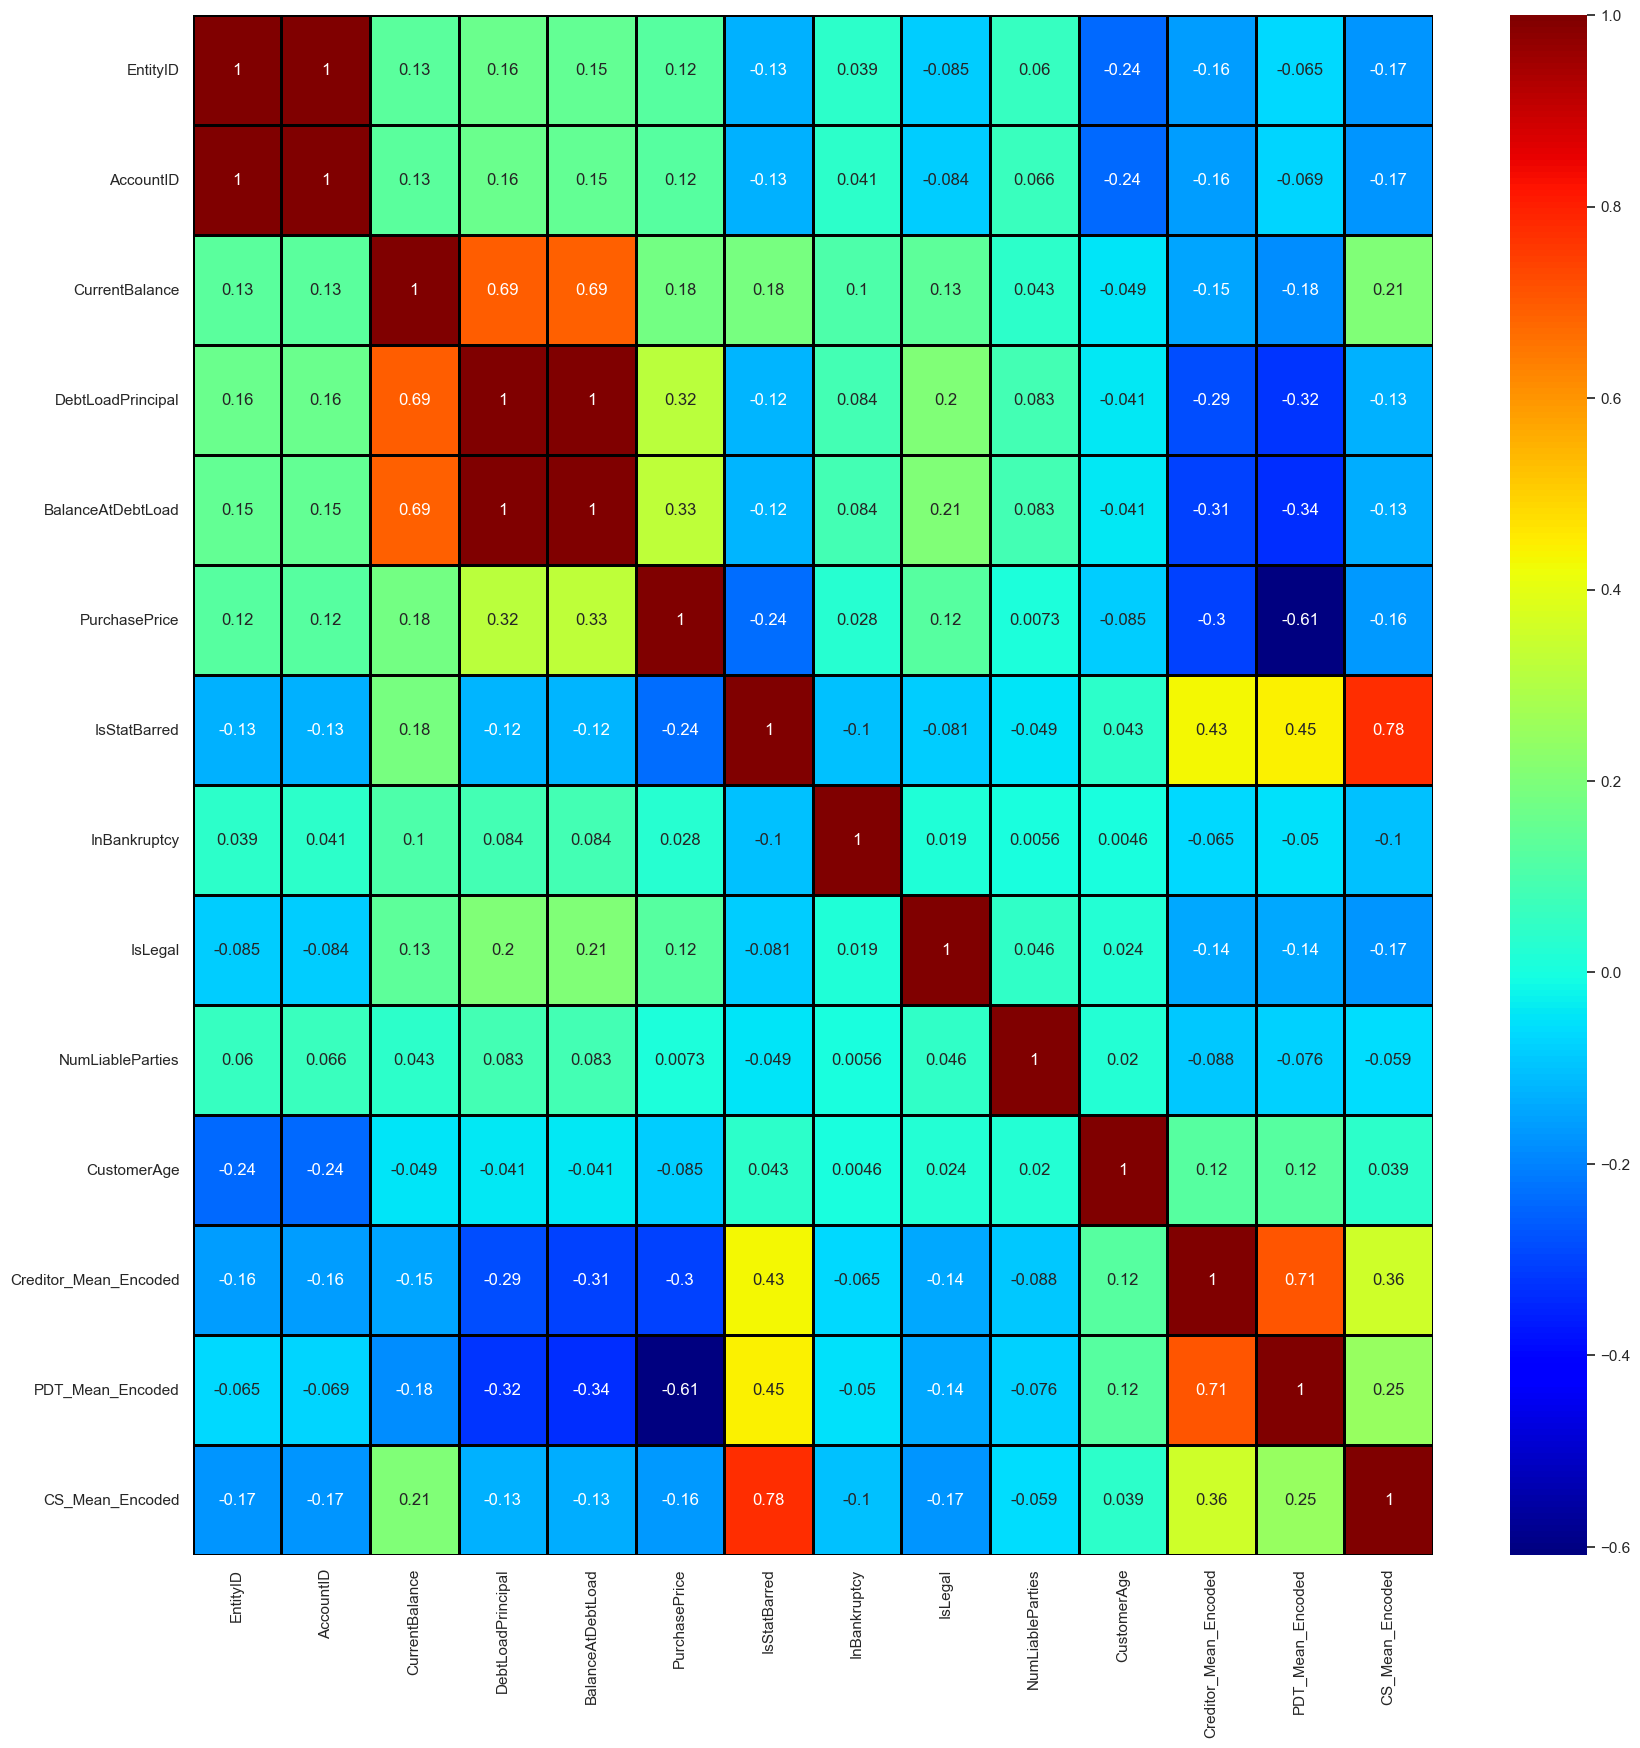

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(),annot=True,cmap='jet',linecolor='black',linewidth=1)
plt.show()

In [64]:
corr_matrix = ds.corr()
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.75:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
for pair in corr_pairs:
    print(f"{pair[0]} and {pair[1]} have a correlation of {pair[2]}")

EntityID and AccountID have a correlation of 0.9973030295124827
DebtLoadPrincipal and BalanceAtDebtLoad have a correlation of 0.9987736907165435
IsStatBarred and CS_Mean_Encoded have a correlation of 0.7757674408767137


In [65]:
corr_pairs

[('EntityID', 'AccountID', 0.9973030295124827),
 ('DebtLoadPrincipal', 'BalanceAtDebtLoad', 0.9987736907165435),
 ('IsStatBarred', 'CS_Mean_Encoded', 0.7757674408767137)]

In [67]:
tar_corr = ds.corrwith(ds['IsStatBarred'])
tar_corr

EntityID                -0.126540
AccountID               -0.127782
CurrentBalance           0.184223
DebtLoadPrincipal       -0.119255
BalanceAtDebtLoad       -0.123712
PurchasePrice           -0.235956
IsStatBarred             1.000000
InBankruptcy            -0.104487
IsLegal                 -0.081038
NumLiableParties        -0.049278
CustomerAge              0.043241
Creditor_Mean_Encoded    0.430489
PDT_Mean_Encoded         0.446512
CS_Mean_Encoded          0.775767
dtype: float64

In [68]:
ds = ds.drop(['EntityID','DebtLoadPrincipal'],axis = 1)
ds.head()

,AccountID,CurrentBalance,BalanceAtDebtLoad,PurchasePrice,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded,PDT_Mean_Encoded,CS_Mean_Encoded
0,3677,0.000000,16.767849,1.249106,0,0,1,1.0,40,0.956376,6.344371,0.011919
1,4276,87.076325,9.705230,1.249106,1,0,0,1.0,31,1.723822,6.344371,0.017447
2,8525,0.000000,13.483307,1.249106,0,0,0,1.0,31,0.956376,6.344371,0.011919
3,9859,818.903843,22.065408,1.249106,1,0,0,1.0,31,1.723822,6.344371,4.639235
4,12807,0.000000,13.368377,1.249106,1,0,1,1.0,33,0.956376,6.344371,0.011919


In [70]:
x = ds.drop(['IsStatBarred'],axis = 1)
x.head()

,AccountID,CurrentBalance,BalanceAtDebtLoad,PurchasePrice,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded,PDT_Mean_Encoded,CS_Mean_Encoded
0,3677,0.000000,16.767849,1.249106,0,1,1.0,40,0.956376,6.344371,0.011919
1,4276,87.076325,9.705230,1.249106,0,0,1.0,31,1.723822,6.344371,0.017447
2,8525,0.000000,13.483307,1.249106,0,0,1.0,31,0.956376,6.344371,0.011919
3,9859,818.903843,22.065408,1.249106,0,0,1.0,31,1.723822,6.344371,4.639235
4,12807,0.000000,13.368377,1.249106,0,1,1.0,33,0.956376,6.344371,0.011919


In [71]:
y = ds['IsStatBarred']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: IsStatBarred, dtype: int32

In [73]:
from sklearn.preprocessing import StandardScaler
for col in x.columns:
    ss = StandardScaler()
    x[col] = ss.fit_transform(x[[col]])

In [74]:
x.head()

,AccountID,CurrentBalance,BalanceAtDebtLoad,PurchasePrice,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,Creditor_Mean_Encoded,PDT_Mean_Encoded,CS_Mean_Encoded
0,-0.849526,-0.928196,0.521016,-0.12164,-0.143077,6.390531,-0.12902,0.625132,-1.640493,-0.637933,-1.689950
1,-0.849525,-0.621814,-0.916183,-0.12164,-0.143077,-0.156482,-0.12902,-0.121967,-1.292069,-0.637933,-1.686692
2,-0.849516,-0.928196,-0.147368,-0.12164,-0.143077,-0.156482,-0.12902,-0.121967,-1.640493,-0.637933,-1.689950
3,-0.849513,1.953151,1.599037,-0.12164,-0.143077,-0.156482,-0.12902,-0.121967,-1.292069,-0.637933,1.037547
4,-0.849507,-0.928196,-0.170755,-0.12164,-0.143077,6.390531,-0.12902,0.044055,-1.640493,-0.637933,-1.689950


In [75]:
y.value_counts()

IsStatBarred
1    284548
0    121875
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.3,random_state=101,stratify=y) # stratified

In [83]:
# model building - 
# 1) XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import  roc_auc_score,roc_curve,precision_score, recall_score, f1_score

In [86]:
modelx = XGBClassifier()

In [87]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(5)
result = cross_val_score(modelx,x_train,y_train,cv=kfold)
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.9768717  0.97444595 0.9757465  0.97557075 0.97625617]
Accuracy:  0.976


In [88]:
modelx.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred_train =modelx.predict(x_train)
pred_y = modelx.predict(x_test)

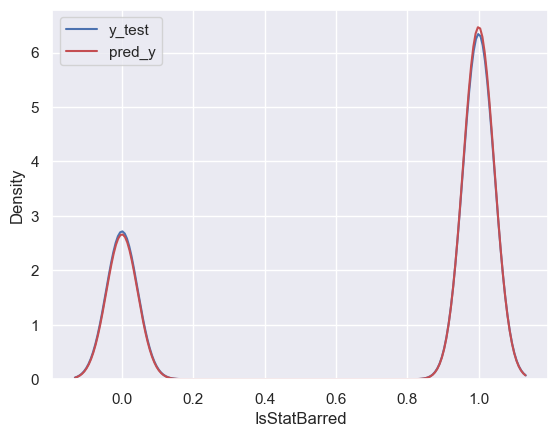

In [90]:
# actual vs predicted graph -
sns.distplot(y_test,label='y_test',hist=False)
sns.distplot(pred_y,label='pred_y',hist=False,color='r')
plt.legend()
plt.show()

In [91]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_y))

Train Accuracy 0.9788257128395478
*****************************************************
Test Accuracy 0.9763875105595972


In [92]:
#classification report-
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     36563
           1       0.98      0.99      0.98     85364

    accuracy                           0.98    121927
   macro avg       0.98      0.97      0.97    121927
weighted avg       0.98      0.98      0.98    121927



In [93]:
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
f1 = f1_score(y_test, pred_y)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.98
Recall: 0.99
F1-score: 0.98


In [94]:
# AUC-ROC score -
xgb_roc_auc = roc_auc_score(y_test, pred_y)
xgb_roc_auc

0.9678453875904908

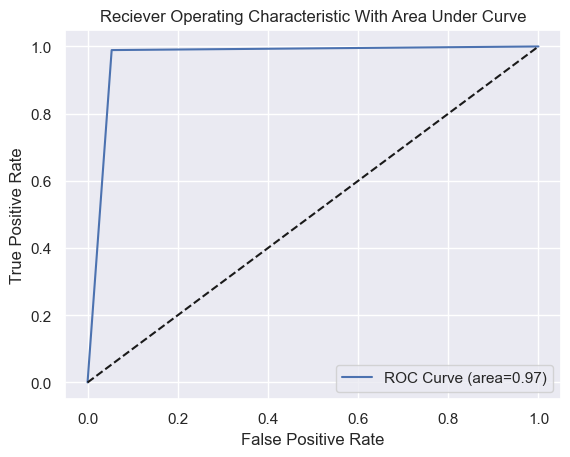

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % xgb_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

Feature: AccountID ,Score: 0.1347545087337494
Feature: CurrentBalance ,Score: 0.011401152238249779
Feature: BalanceAtDebtLoad ,Score: 0.007059711031615734
Feature: PurchasePrice ,Score: 0.007107219193130732
Feature: InBankruptcy ,Score: 0.007256291341036558
Feature: IsLegal ,Score: 0.015020139515399933
Feature: NumLiableParties ,Score: 0.001633134321309626
Feature: CustomerAge ,Score: 0.0018647764809429646
Feature: Creditor_Mean_Encoded ,Score: 0.012263567186892033
Feature: PDT_Mean_Encoded ,Score: 0.019810542464256287
Feature: CS_Mean_Encoded ,Score: 0.7818288803100586


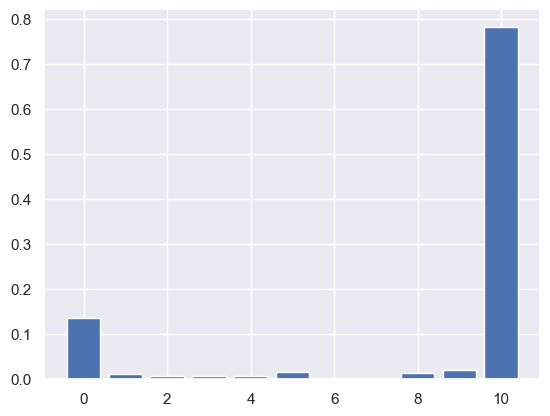

In [96]:
# feature importance - 
importance = modelx.feature_importances_
# summarize feature importance
listx=[]
for i,v in enumerate(importance):
 print(f'Feature: {x.columns[i]} ,Score: {v}')
 z = [x.columns[i],v]
 listx.append(z)
# plot feature importance
plt.bar([x for x in range(len(importance))],importance)
# plt.xticks(listx[i], rotation=65)
plt.show()

In [97]:
# 2) Randomforest classifier - 
from sklearn.ensemble import RandomForestClassifier
modely = RandomForestClassifier()

In [98]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(5)
result = cross_val_score(modely,x_train,y_train,cv=kfold)
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.97481547 0.97337387 0.97414717 0.97372537 0.97520167]
Accuracy:  0.974


In [99]:
modely.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
y_pred_train =modelx.predict(x_train)
pred_y = modelx.predict(x_test)

In [101]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_y))

Train Accuracy 0.9788257128395478
*****************************************************
Test Accuracy 0.9763875105595972


In [102]:
#classification report-
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     36563
           1       0.98      0.99      0.98     85364

    accuracy                           0.98    121927
   macro avg       0.98      0.97      0.97    121927
weighted avg       0.98      0.98      0.98    121927



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,2,4,8],
    'min_samples_split': [2,3,5,10],
    'min_samples_leaf': [2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_